<a href="https://colab.research.google.com/github/Panperception/Face2Brain/blob/main/Face2Brain_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load PD DBS Face Data

In [1]:
!pip install tensorflow
import keras
import matplotlib.pyplot as plt

import numpy as np
import scipy.io

from google.colab import drive
drive.mount('/content/gdrive')

##!cp '/content/gdrive/My Drive/FacePD/PD_DBS_Data.mat' PD_DBS_Data.mat

mat = scipy.io.loadmat('/content/gdrive/My Drive/FacePD/PD_DBS_Data.mat')
x_train = mat['x_train']
x_test = mat['x_test']
y_train = mat['y_train']
y_test = mat['y_test']



Mounted at /content/gdrive


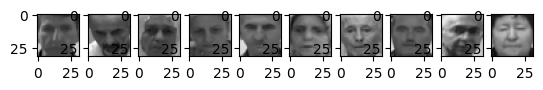

In [2]:
for k in range(10):
  tmp=x_test[k*100,].reshape((32,32))
  plt.subplot(1,10,k+1)
  plt.imshow(np.tile(tmp,[3,1,1]).T)


## DNN Classifiers

Epoch 1/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5996 - loss: 0.6894 - val_accuracy: 0.6102 - val_loss: 0.6545
Epoch 2/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6263 - loss: 0.6390 - val_accuracy: 0.6441 - val_loss: 0.6208
Epoch 3/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6382 - loss: 0.6242 - val_accuracy: 0.7797 - val_loss: 0.5820
Epoch 4/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7046 - loss: 0.5642 - val_accuracy: 0.4576 - val_loss: 0.8534
Epoch 5/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.5694 - val_accuracy: 0.7119 - val_loss: 0.5737
Epoch 6/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7071 - loss: 0.5615 - val_accuracy: 0.4915 - val_loss: 0.7248
Epoch 7/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7401 - loss: 0.5169 - val_accuracy: 0.6610 - val_loss: 0.5919
Epoch 8/350
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7652 - loss: 0.5042 - val_accuracy: 0.8305 - 

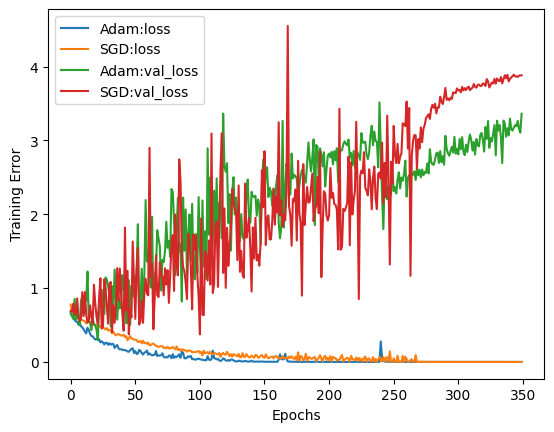

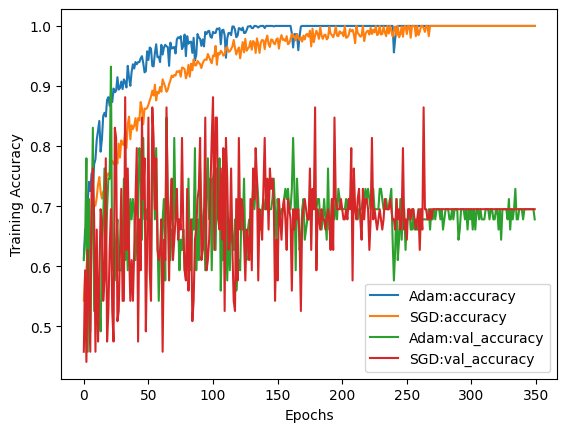

In [38]:
# Convert labels to categorical one-hot encoding
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)

inputsize = 1024

# define a 4 hidden layer DNN
model_dmlp_adam = keras.Sequential()
model_dmlp_adam.add(keras.Input(shape=(inputsize,)))
model_dmlp_adam.add(keras.layers.Dense(256, activation='sigmoid'))
model_dmlp_adam.add(keras.layers.Dense(32, activation='relu'))
model_dmlp_adam.add(keras.layers.Dense(2, activation='softmax'))
model_dmlp_adam.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
hist1=model_dmlp_adam.fit(x_train, one_hot_labels,
                          epochs=350, validation_split=0.05, batch_size=32, callbacks=[])

# define a 4 hidden layer DNN
model_dmlp_SGD = keras.Sequential()
model_dmlp_SGD.add(keras.Input(shape=(inputsize,)))
model_dmlp_SGD.add(keras.layers.Dense(256, activation='sigmoid'))
model_dmlp_SGD.add(keras.layers.Dense(32, activation='relu'))
model_dmlp_SGD.add(keras.layers.Dense(2, activation='softmax'))
model_dmlp_SGD.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model, iterating on the data in batches of 32 samples
hist2=model_dmlp_SGD.fit(x_train, one_hot_labels,
                         epochs=350, validation_split=0.05, batch_size=32, callbacks=[])


plt.figure(1);
plt.plot(hist1.history["loss"]);
plt.plot(hist2.history["loss"]);
plt.plot(hist1.history["val_loss"]);
plt.plot(hist2.history["val_loss"]);
plt.xlabel('Epochs');
plt.legend(['Adam:loss', 'SGD:loss', 'Adam:val_loss', 'SGD:val_loss'])
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist1.history["accuracy"]);
plt.plot(hist2.history["accuracy"]);
plt.plot(hist1.history["val_accuracy"]);
plt.plot(hist2.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.legend(['Adam:accuracy', 'SGD:accuracy', 'Adam:val_accuracy', 'SGD:val_accuracy'])
plt.ylabel('Training Accuracy');

In [39]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_dmlp_adam.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))

# Overall F1 score

#intermediate_layer_model = keras.Model(inputs=model_dmlp_SGD.input,
#                                 outputs=model_dmlp_SGD.layers[0].output)
#intermediate_output = intermediate_layer_model.predict(x_test)
#ws=model_dmlp_SGD.layers[0].get_weights()
#y00=np.matmul(x_test,ws[0])+np.tile(ws[1],[x_test.shape[0],1])


y_pred=np.argmax(model_dmlp_SGD.predict(x_test), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
#print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
F1 Score:   0.9389200969731056
Precision:  0.9462075633863343
Recall:     0.9341860812425329
Accuracy:     0.9410760034158838
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
F1 Score:   0.9472062757356257
Precision:  0.9505460412012907
Recall:     0.9445952807646356
Accuracy:     0.9487617421007686


## Pretrained VGG16

In [43]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.vgg16 import VGG16

## Loading VGG16 model
pre_model = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model.summary()

# from keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=15,  restore_best_weights=True)


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,784,546 (56.40 MB)

 Trainable params: 69,858 (272.88 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.5664 - loss: 0.7015 - val_accuracy: 0.3559 - val_loss: 0.9168
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6721 - loss: 0.6070 - val_accuracy: 0.5085 - val_loss: 0.8399
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7242 - loss: 0.5306 - val_accuracy: 0.5593 - val_loss: 0.7767
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7701 - loss: 0.4851 - val_accuracy: 0.6271 - val_loss: 0.6667
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7900 - loss: 0.4399 - val_accuracy: 0.6441 - val_loss: 0.6791
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8298 - loss: 0.3747 - val_accuracy: 0.7627 - val_loss: 0.4674
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8501 - loss: 0.3442 - val_accuracy: 0.6610 - val_loss: 0.6831
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8766 - loss: 0.3085 - val_accuracy: 0

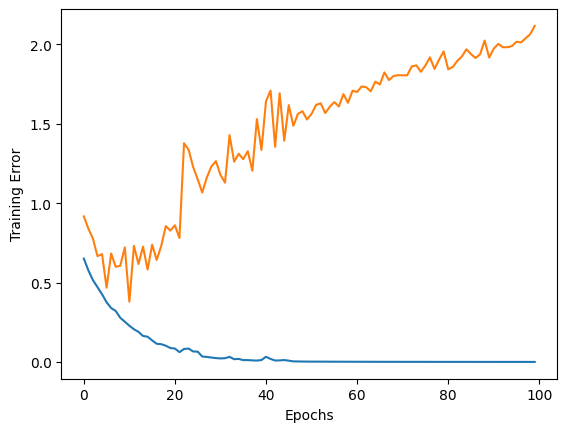

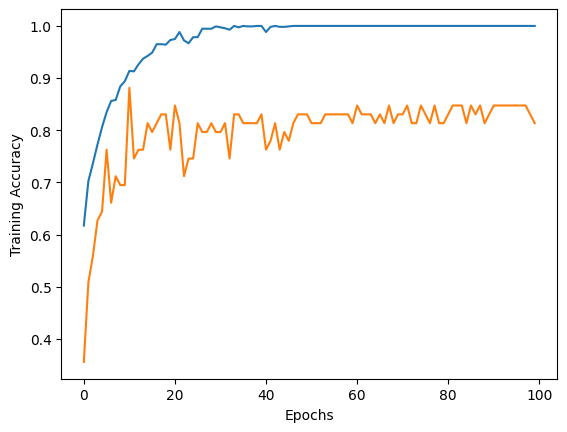

In [44]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_v16=model.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_v16.history["loss"]);
plt.plot(hist_v16.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_v16.history["accuracy"]);
plt.plot(hist_v16.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [45]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))



37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
F1 Score:   0.9104106161342198
Precision:  0.9125165822479498
Recall:     0.9086723416965352
Accuracy:     0.9128949615713066
Accuracy:     0.9128949615713066


## Pretrained ResNet50

In [58]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.resnet import ResNet50

## Loading VGG16 model
pre_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_resnet50 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_resnet50.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_33      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_33[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1, 1, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,854,178 (91.00 MB)

 Trainable params: 266,466 (1.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [59]:
# from keras.callbacks import EarlyStopping

model_resnet50.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 288ms/step - accuracy: 0.5145 - loss: 0.9148 - val_accuracy: 0.4407 - val_loss: 0.7766
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5349 - loss: 0.6951 - val_accuracy: 0.4407 - val_loss: 0.8944
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5951 - loss: 0.6663 - val_accuracy: 0.3051 - val_loss: 0.7675
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5319 - loss: 0.6994 - val_accuracy: 0.4407 - val_loss: 0.9094
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5157 - loss: 0.7357 - val_accuracy: 0.4407 - val_loss: 0.9145
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5681 - loss: 0.6684 - val_accuracy: 0.4407 - val_loss: 0.9022
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6035 - loss: 0.6782 - val_accuracy: 0.4407 - val_loss: 0.9399
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5786 - loss: 0.6856 - val_accuracy: 0

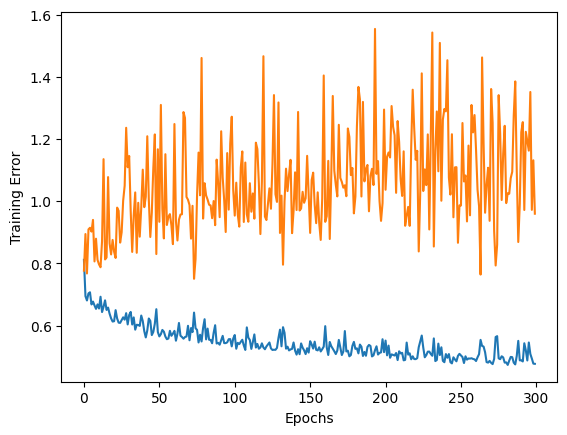

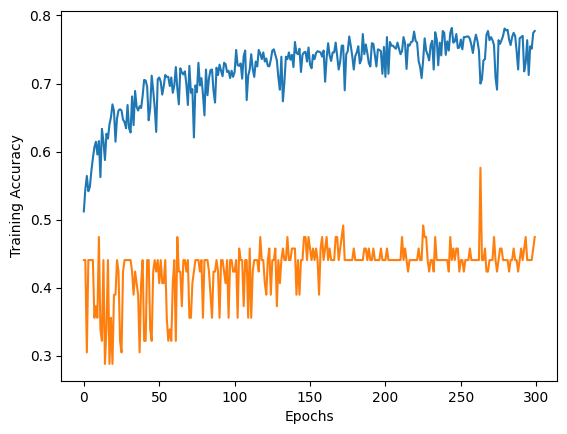

In [60]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_ResNet=model_resnet50.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_ResNet.history["loss"]);
plt.plot(hist_ResNet.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_ResNet.history["accuracy"]);
plt.plot(hist_ResNet.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_resnet50.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))



37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step
F1 Score:   0.7285786255311153
Precision:  0.7337354506638591
Recall:     0.7387201314217443
Accuracy:     0.7292912040990607
Accuracy:     0.7292912040990607


## Pretrained VGG19

In [62]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.vgg19 import VGG19

## Loading VGG16 model
pre_model = VGG19(include_top=False, weights='imagenet', input_shape=(32,32,3))
pre_model.trainable = False ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model_v19 = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model_v19.summary()

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_35 (InputLayer)     │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 4, 4, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 2, 2, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 1, 1, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg19 (Functional)              │ (None, 1, 1, 512)      │    20,024,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_12 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,094,242 (76.65 MB)

 Trainable params: 69,858 (272.88 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [63]:
# from keras.callbacks import EarlyStopping

model_v19.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)


Epoch 1/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.5788 - loss: 0.6752 - val_accuracy: 0.4237 - val_loss: 0.7907
Epoch 2/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7179 - loss: 0.5596 - val_accuracy: 0.4915 - val_loss: 0.8070
Epoch 3/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7612 - loss: 0.4930 - val_accuracy: 0.6271 - val_loss: 0.6599
Epoch 4/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7385 - loss: 0.5166 - val_accuracy: 0.5763 - val_loss: 0.8789
Epoch 5/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7837 - loss: 0.4392 - val_accuracy: 0.5932 - val_loss: 0.9781
Epoch 6/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8051 - loss: 0.4320 - val_accuracy: 0.6441 - val_loss: 0.7508
Epoch 7/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8268 - loss: 0.3955 - val_accuracy: 0.6610 - val_loss: 0.9261
Epoch 8/300
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8167 - loss: 0.3993 - val_accuracy: 0.

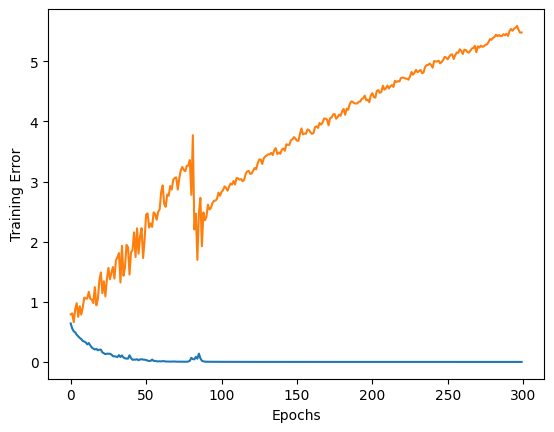

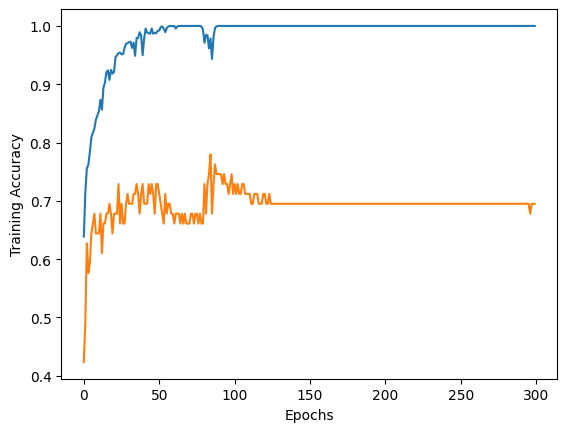

In [64]:
one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)
hist_v19=model_v19.fit(np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3), one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_v19.history["loss"]);
plt.plot(hist_v19.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_v19.history["accuracy"]);
plt.plot(hist_v19.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


In [65]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model_v19.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step
F1 Score:   0.9075265582401053
Precision:  0.9111085835608128
Recall:     0.9048461768219833
Accuracy:     0.910333048676345
Accuracy:     0.910333048676345


## Pretrained Inception

In [66]:
import keras
import matplotlib.pyplot as plt

#img_size_target = 32;
#img_input = tf.keras.layers.Input(shape=(img_size_target, img_size_target,1))
#img_conc = tf.keras.layers.Concatenate()([img_input, img_input, img_input])

from keras.applications.xception import Xception

## Loading VGG16 model
pre_model = Xception(input_shape = (256, 256, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')
pre_model.trainable = False ## Not trainable weights

from keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(128, activation='relu')
dense_layer_2 = layers.Dense(32, activation='relu')
prediction_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    pre_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

pre_model.summary()
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_37      │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 127, 127,  │        864 │ input_layer_37[0… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 127, 127,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 127, 127,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 125, 125,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 125, 125,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 125, 125,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 125, 125,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 125, 125,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 125, 125,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 125, 125,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 125, 125,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 63, 63,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 63, 63,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 63, 63,    │        512 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_12 (Add)        │ (None, 63, 63,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 63, 63,    │          0 │ add_12[0][0]    

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 8, 8, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,643,018 (143.60 MB)

 Trainable params: 16,781,538 (64.02 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [69]:
# from keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

# es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

one_hot_labels = keras.utils.to_categorical(y_train, num_classes=2)

xx = np.repeat(x_train.reshape(x_train.shape[0],32,32,1), 3, axis=3).resize(512,512)
# np.repeat(x_train.reshape((x_train.shape[0],32,32,1)), 3, axis=3)
hist_Inception=model.fit(xx, one_hot_labels, epochs=300, validation_split=0.05, batch_size=32, callbacks=[])

plt.figure(1);
plt.plot(hist_Inception.history["loss"]);
plt.plot(hist_Inception.history["val_loss"]);
plt.xlabel('Epochs');
plt.ylabel('Training Error');

plt.figure(2);
plt.plot(hist_Inception.history["accuracy"]);
plt.plot(hist_Inception.history["val_accuracy"]);
plt.xlabel('Epochs');
plt.ylabel('Training Accuracy');


AttributeError: 'NoneType' object has no attribute 'shape'

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Overall F1 score
y_pred=np.argmax(model.predict(np.repeat(x_test.reshape((x_test.shape[0],32,32,1)), 3, axis=3)), axis=1)
print("F1 Score:  ", f1_score(y_test, y_pred, average="macro"))
print("Precision: ", precision_score(y_test, y_pred, average="macro"))
print("Recall:    ", recall_score(y_test, y_pred, average="macro"))
print("Accuracy:    ", accuracy_score(y_test, y_pred))
print("Accuracy:    ", np.mean(y_pred.reshape(1171,1)==y_test))


## Summary

In [ ]:
#plt.plot(hist1.history['loss']);
plt.plot(hist_v16.history['loss']);
plt.plot(hist_v19.history['loss']);
plt.plot(hist_ResNet.history['loss']);
plt.legend(['V16', 'V19', 'ResNet50'])

#plt.plot(hist_ResNet.history['accuracy']);
#plt.plot(hist_v19.history['val_loss']);
#plt.plot(hist_v19.history['val_accuracy']);
plt.xlabel('Epochs');
plt.ylabel('Training Criteria');